### 1. Importing libraries

In [ ]:
import numpy as np
import cv2
import urllib.request as urllib
from matplotlib import pyplot as plt

### 2. Loading images
load local images or fetch images from project github repository

(694, 632, 3)


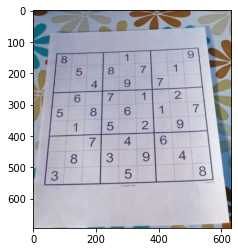

In [ ]:
imgs = ['picture_2.jpeg', '']
try:
  img = cv2.imread('images/'img_path)
  print(img.shape)
except:
  img_url = f'https://raw.githubusercontent.com/borisivnc/sudoku-game/main/notebooks/images/{img}'
  with urllib.urlopen(img_url) as resp:
    img = np.asarray(bytearray(resp.read()), dtype="uint8")
    img = cv2.imdecode(img, cv2.IMREAD_COLOR)
  print(img.shape)
plt.imshow(img)
plt.show()

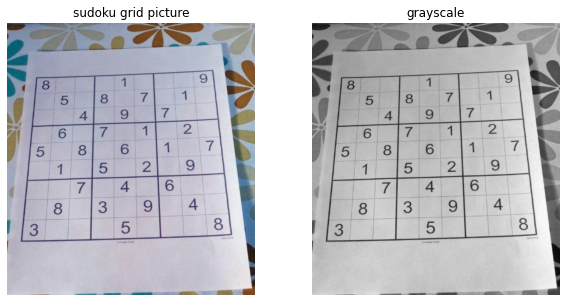

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) # Convert a color image to grayscale
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.title('sudoku grid picture')
plt.subplot(122)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title('grayscale')
plt.show()

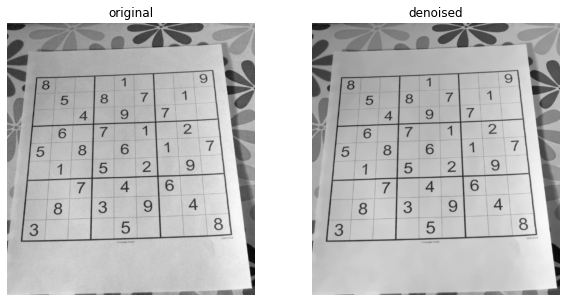

In [ ]:
denoised_img = cv2.fastNlMeansDenoising(gray)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title('original')
plt.subplot(122)
plt.imshow(denoised_img, cmap='gray')
plt.axis('off')
plt.title('denoised')
plt.show()

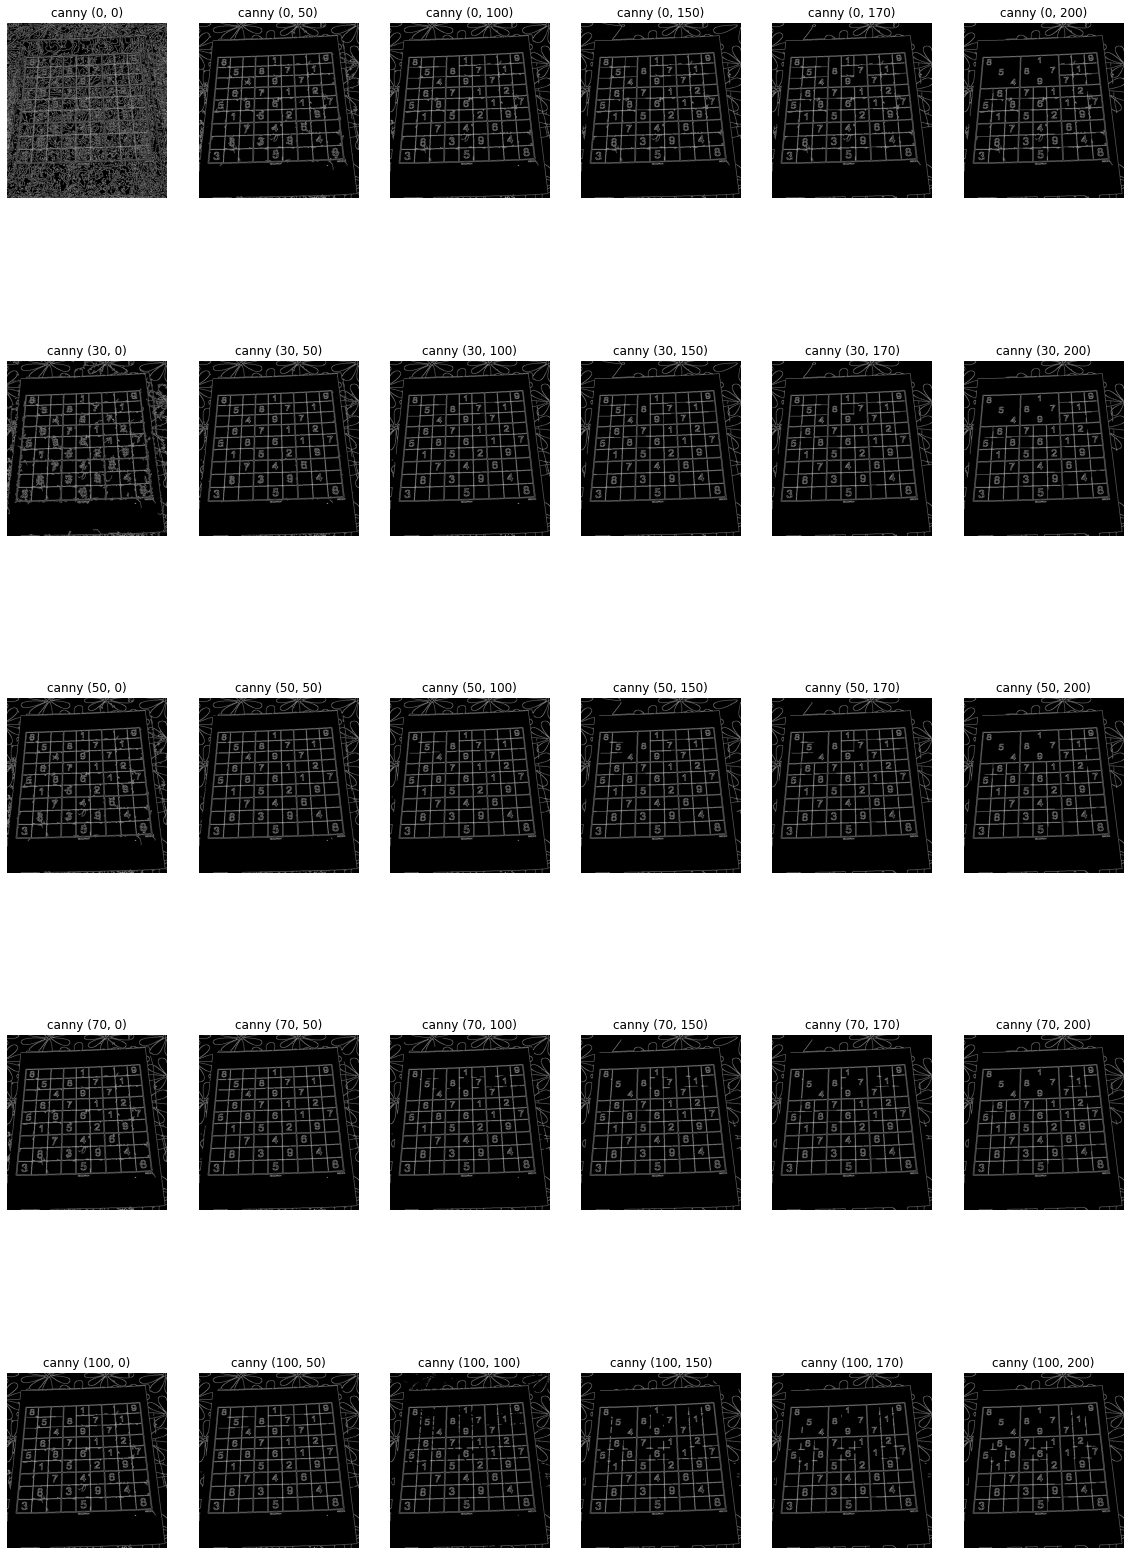

In [ ]:
#canny experiments
'''
treshold1 = [0, 30, 50, 70, 100]
treshold2 = [0, 50, 100, 150, 170, 200]
rows = len(treshold1)
cols = len(treshold2)
fig = plt.figure(figsize=(4 * rows, 5 * cols))
for i, tr1 in enumerate(treshold1):
  for j, tr2, in enumerate(treshold2):
    plt.subplot(rows, cols, i * cols + j + 1)
    edges = cv2.Canny(denoised_img, tr1, tr2, apertureSize = 3)
    plt.imshow(edges, cmap='gray')
    plt.axis('off')
    plt.title(f'canny ({tr1}, {tr2})')
plt.show()
# ''';

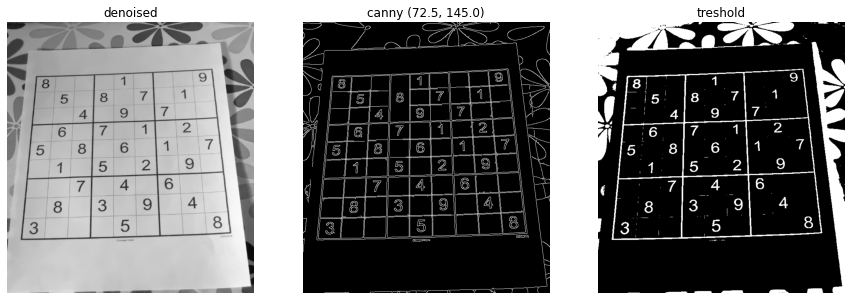

In [ ]:
plt.figure(figsize=(15, 7))
plt.subplot(131)
plt.imshow(denoised_img, cmap='gray')
plt.axis('off')
plt.title('denoised')
plt.subplot(132)
otsu, tr_img = cv2.threshold(denoised_img, 50, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
edges = cv2.Canny(denoised_img, otsu/8, otsu)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title(f'canny ({otsu/2}, {otsu})')
plt.subplot(133)
plt.imshow(tr_img, cmap='gray')
plt.axis('off')
plt.title('treshold')
plt.show()

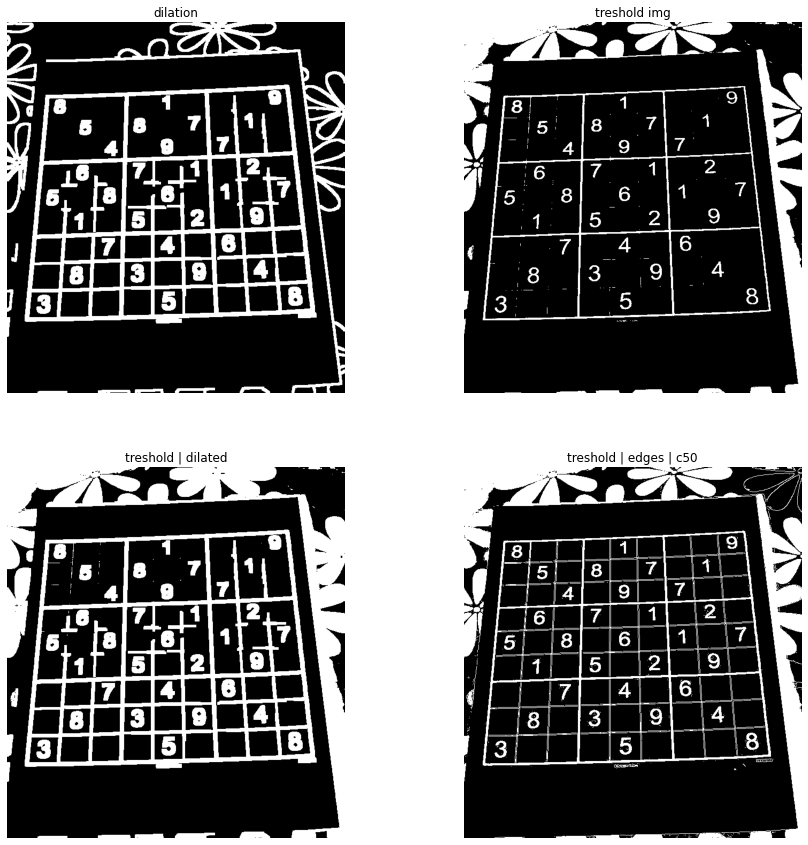

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(221)
kernel = np.ones((3, 3), np.uint8)
dilation = cv2.dilate(edges, kernel, iterations=2)
plt.imshow(dilation, cmap='gray')
plt.axis('off')
plt.title('dilation')
plt.subplot(222)
plt.imshow(tr_img, cmap='gray')
plt.axis('off')
plt.title('treshold img')
plt.subplot(223)
plt.imshow(tr_img | dilation, cmap='gray')
plt.axis('off')
plt.title('treshold | dilated')
plt.subplot(224)
canny50 = cv2.Canny(denoised_img, 50, 50)
plt.imshow(tr_img | edges | canny50, cmap='gray')
plt.axis('off')
plt.title('treshold | edges | c50')
plt.show()

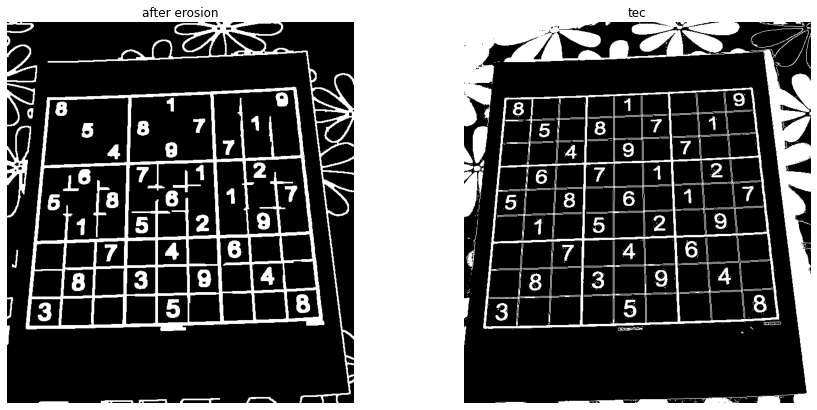

In [ ]:
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(dilation,kernel,iterations = 1)
plt.figure(figsize=(15,7))
plt.subplot(121)
plt.imshow(erosion, 'gray')
plt.axis('off')
plt.title('after erosion')
plt.subplot(122)
plt.imshow(tr_img | edges | canny50, 'gray')
plt.axis('off')
plt.title('tec')
plt.show()